#### 타이타닉 데이터를 활용한 승선자의 생사여부 예측
##### EDA를 활용한 Feature, Target 구성 여부 확인

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('../Data/train.csv')

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Age의 칼럼 선택 여부 확인 : 결측치가 20% 이상이면 해당 컬럼은 사용할 수 없다.
(len(train_df) - train_df.Age.count()) / len(train_df) * 100

np.float64(19.865319865319865)

In [5]:
print(len(train_df.Age))
print(train_df.Age.count())

891
714


In [6]:
# Age가 null인 컬럼과 null이 아닌 dataFrame으로 생성하기
age_null = train_df[train_df.Age.isnull()]
age_not_null = train_df[train_df.Age.notna()]
len(age_null) + len(age_not_null)

891

In [7]:
# Survived와 Pclass 기준으로 Dataset 정렬 : 정렬 후, index 재정리 필요
train_df = train_df.sort_values(by=['Survived','Pclass']).reset_index(drop=True)

In [8]:
train_df.shape
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


In [9]:
# Survived 기준으로 생존과 사망의 Count 확인
print(f'사망자수 : {train_df[train_df.Survived == 0].shape[0]}') # 사망자수
print(f'생존자수 : {train_df[train_df.Survived == 1].shape[0]}') # 생존자수

사망자수 : 549
생존자수 : 342


In [10]:
# Pie Chart
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [11]:
# 생존과 사망의 DataFrame 만들기
result = [train_df[train_df.Survived == 0].shape[0], train_df[train_df.Survived == 1].shape[0]]

live_death = pd.DataFrame(
    {
        'Result' : result
    },
    index=['사망','생존']
)

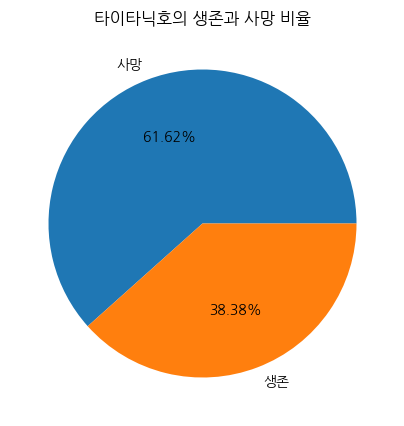

In [12]:
plt.figure(figsize=(14,5))
live_death.Result.plot(
    kind='pie',
    autopct='%.2f%%'
)
plt.title('타이타닉호의 생존과 사망 비율')

plt.show()

>  Target의 비율이 60%보다 크므로 Target으로 약간 아쉽지만 적합하다.

----
### Feature 칼럼 선택

In [13]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Sex 컬럼이 Feature로 적합한지 확인
: null도 없고 Category 갯수도 적다.
> 타겟은 5:5의 비율이 적합하다.                 
> 특징은 카테고리 안에서 비율이 5:5면 못 쓴다. 


In [14]:
train_df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

> 남성의 승선수가 여성의 승선수보다 거의 2배이다.                   
Feature는 차이가 나는 특성이 필요한데, 일단 승선수만 보면 Feature로 사용할 수 있을 것 같다.

#### Target 컬럼과 연결하여 Feature가 될 수 있는지 확인

In [15]:
# 여성의 생존과 사망수
female_survived = train_df[(train_df.Sex == 'female') & (train_df.Survived == 1)].shape[0]
female_death = train_df[(train_df.Sex == 'female') & (train_df.Survived == 0)].shape[0]
print(f'여성의 생존수는 {female_survived}이고 사망자수는 {female_death}이다')

여성의 생존수는 233이고 사망자수는 81이다


In [16]:
# 여성의 생존과 사망수
male_survived = train_df[(train_df.Sex == 'male') & (train_df.Survived == 1)].shape[0]
male_death = train_df[(train_df.Sex == 'male') & (train_df.Survived == 0)].shape[0]
print(f'남성의 생존수는 {male_survived}이고 사망자수는 {male_death}이다')

남성의 생존수는 109이고 사망자수는 468이다


> 여성과 남성의 생존여부를 연결하여 특징을 보았는데 성별로 정반대의 특징을 나타난다.                
Sex컬럼은 Feature로서 충분하다.


----
### Pclass의 Feature확인

In [17]:
# Pclass의 Category 분포 확인
train_df.Pclass.value_counts().sort_index()

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

> 객실의 등급별 인원수로 보아 1,2등급은 크게 차이나지 않지만, 1과 3 그리고 2와 3은 차이가 있어 Feature의 가능성이 보임

#### [Survived]<->[Sex, Plcass확인]

In [18]:
# 1등 객실의 여성 생존율
female_count = train_df[(train_df.Sex == 'female') & (train_df.Pclass == 1)].shape[0] 
female_live = train_df[(train_df.Sex == 'female') & (train_df.Pclass == 1)& (train_df.Survived == 1)].shape[0] 
print(f'1등 객실의 여성의 생존율은 {female_live} / {female_count}로 {round(female_live/ female_count * 100)}%이다.')

1등 객실의 여성의 생존율은 91 / 94로 97%이다.


In [19]:
for pclass in train_df.Pclass.unique():
    female_count = train_df[(train_df.Sex == 'female') & (train_df.Pclass == pclass)].shape[0] 
    female_live = train_df[(train_df.Sex == 'female') & (train_df.Pclass == pclass)& (train_df.Survived == 1)].shape[0] 
    print(f'{pclass}등 객실의 여성의 생존율은 총 {female_count}명 중에 {female_live}명으로 {round(female_live/ female_count * 100)}%이다.')


1등 객실의 여성의 생존율은 총 94명 중에 91명으로 97%이다.
2등 객실의 여성의 생존율은 총 76명 중에 70명으로 92%이다.
3등 객실의 여성의 생존율은 총 144명 중에 72명으로 50%이다.


In [20]:
for sex in train_df.Sex.unique():
    for pclass in train_df.Pclass.unique():
        male_count = train_df[(train_df.Sex == sex) & (train_df.Pclass == pclass)].shape[0] 
        male_live = train_df[(train_df.Sex == sex) & (train_df.Pclass == pclass)& (train_df.Survived == 1)].shape[0] 
        print(f'{pclass}등 객실의 {'남성' if sex == 'male' else '여성'}의 생존율은 총 {male_count:>3}명 중에 {male_live:>2}명으로 {round(male_live/ male_count * 100,2):0^5}%이다.')
    print('-'*50)    


1등 객실의 남성의 생존율은 총 122명 중에 45명으로 36.89%이다.
2등 객실의 남성의 생존율은 총 108명 중에 17명으로 15.74%이다.
3등 객실의 남성의 생존율은 총 347명 중에 47명으로 13.54%이다.
--------------------------------------------------
1등 객실의 여성의 생존율은 총  94명 중에 91명으로 96.81%이다.
2등 객실의 여성의 생존율은 총  76명 중에 70명으로 92.11%이다.
3등 객실의 여성의 생존율은 총 144명 중에 72명으로 50.00%이다.
--------------------------------------------------


### [Surviced] <-> [Sex, Placss]로 결정

In [21]:
train_df.Embarked.unique()

<StringArray>
['S', 'C', 'Q', nan]
Length: 4, dtype: str

In [22]:
# Nan인 데이터 찾기
train_df[ train_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
556,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
672,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [23]:
# 항구별 승선 인원
train_df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

> nan -> S

In [24]:
train_df.loc [train_df.Embarked.isnull(),'Embarked'] = 'S'
train_df.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [25]:
# 항구별 성별 승선 인원
train_df.groupby(
    ['Embarked','Sex'],
).size()

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    205
          male      441
dtype: int64

In [26]:
# 항구별 생존 인원
train_df.groupby(
    ['Embarked','Survived'],
).size()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
dtype: int64

In [27]:
# 항구별 객실 승선 인원
train_df.groupby(
    ['Embarked','Pclass'],
).size()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         129
          2         164
          3         353
dtype: int64

In [28]:
list1 = set(train_df['Ticket'].str[0])
list1 = list(list1)
list1.sort()
total_count = 0
total_live = 0

train_df.loc[:,"TicketInit"] = train_df['Ticket'].str[0]

# train_ml = pd.get_dummies(
#     data=train,
#     columns=['Embarked','TicketInit']
# )
# train_ml.head()

# for index in list1:
#     total_count = 0
#     total_live = 0
#     train_df.loc[:,(train_df['Ticket'].str[0]==index)] = (train_df['Ticket'].str[0]==index)
#     for plc in train_df['Pclass'].unique():

#         count = train_df[(train_df['Ticket'].str[0]==index) & (train_df['Pclass']== plc)].shape[0] 
#         live = train_df[(train_df['Ticket'].str[0]==index) & (train_df['Pclass']== plc) & (train_df.Survived == 1)].shape[0] 
#         total_count += count
#         total_live += live
#         # if count > 0:
#         #     print(f'{plc}등급, {index}으로 시작하는 티겟 소지자의 생존율은 총 {count:>3}명 중에 {live:>3}명으로 {round(live/ count * 100,2):0^5}%이다.')
#         #     print('-'*50)    
#         # else :
#             # print(f'{plc}등급, {index}으로 시작하는 티겟을 소지한 사람은 없다.')
#     print(f'{index}으로 시작하는 티겟 소지자의 생존율은 총 {total_count:>3}명 중에 {total_live:>3}명으로 {round(total_live/ total_count * 100,2):0^5}%이다.')
#     print('-'*50)    

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketInit
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,1
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,P
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,P
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,1
887,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,3
888,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C,2
889,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,3


----
#### [Survived]<->[Sex, Pclass, Embarked]

In [29]:
train = train_df[['Survived','Sex','Pclass','Embarked', 'TicketInit']]
train.head()

,Survived,Sex,Pclass,Embarked,TicketInit
0,0,male,1,S,1
1,0,male,1,S,1
2,0,male,1,C,P
3,0,male,1,C,P
4,0,male,1,S,1


In [30]:
# Sex 칼럼을 SexCode로 숫자화 시킨다.
train.loc[train_df.Sex == 'female','SexCode'] = 0
train.loc[train_df.Sex == 'male','SexCode'] = 1
train.head()

,Survived,Sex,Pclass,Embarked,TicketInit,SexCode
0,0,male,1,S,1,1.0
1,0,male,1,S,1,1.0
2,0,male,1,C,P,1.0
3,0,male,1,C,P,1.0
4,0,male,1,S,1,1.0


In [31]:
# Sex 컬럼 삭제
del train['Sex']
train.head()

,Survived,Pclass,Embarked,TicketInit,SexCode
0,0,1,S,1,1.0
1,0,1,S,1,1.0
2,0,1,C,P,1.0
3,0,1,C,P,1.0
4,0,1,S,1,1.0


In [32]:
# One-hot-encoding으로 Embarked 정리
train_ml = pd.get_dummies(
    data=train,
    columns=['Embarked','TicketInit']
)
train_ml.head()

,Survived,Pclass,SexCode,Embarked_C,Embarked_Q,Embarked_S,TicketInit_1,TicketInit_2,TicketInit_3,TicketInit_4,...,TicketInit_7,TicketInit_8,TicketInit_9,TicketInit_A,TicketInit_C,TicketInit_F,TicketInit_L,TicketInit_P,TicketInit_S,TicketInit_W
0,0,1,1.0,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,1,1.0,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,1,1.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0,1,1.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,1,1.0,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


----
#### RandomForest로 예측 확인

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [34]:
# Train과 Test 분리

train_data, test_data, train_target, test_target = train_test_split(
    train_ml.iloc[:,1:],
    train_ml['Survived'],
    random_state=42,
    stratify=train_ml['Survived']
)

In [35]:
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(668, 21)
(223, 21)
(668,)
(223,)


In [36]:
# 데이터 학습시키고 예측하기
clf = RandomForestClassifier()
clf.fit(train_data,train_target)
print('Train : ',clf.score(train_data, train_target))
print('Test  : ',clf.score(test_data, test_target))

Train :  0.8173652694610778
Test  :  0.820627802690583


In [37]:
# Confusion Mmetrix
from sklearn.metrics import confusion_matrix, accuracy_score
pred = clf.predict(test_data)

In [38]:
accuracy_score(test_target, pred)

0.820627802690583

In [39]:
conf_matrix = confusion_matrix(test_target, pred)
conf_matrix

array([[123,  14],
       [ 26,  60]])

In [40]:
print('사망 :', conf_matrix[0][0]/(conf_matrix[0][0]+conf_matrix[0][1]))
print('생존 :', conf_matrix[1][1]/(conf_matrix[0][1]+conf_matrix[1][1]))

사망 : 0.8978102189781022
생존 : 0.8108108108108109


In [41]:
print('사망 :', 131/(131+6))
print('생존 :', 54/(32+54))

사망 : 0.9562043795620438
생존 : 0.627906976744186


#### Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
scores = cross_val_score(
    clf, train_ml.loc[:,'Pclass':],
    train_ml['Survived'],
    cv=5,
    scoring='accuracy'
)
scores

array([0.54189944, 0.83146067, 0.79775281, 0.7752809 , 0.64044944])

In [44]:
scores.mean()

np.float64(0.7173686523131002)

In [45]:
print(train_df.SibSp.unique())
print(train_df.Parch.unique())

[0 3 1 2 4 5 8]
[0 2 1 4 5 3 6]


In [46]:
for sib in train_df.SibSp.unique():
    for sex in train_df.Sex.unique():
        male_count = train_df[(train_df.Sex == sex) & (train_df.SibSp == sib)].shape[0] 
        male_live = train_df[(train_df.Sex == sex) & (train_df.SibSp == sib)& (train_df.Survived == 1)].shape[0] 
        print(f'{pclass}등 객실의 {'남성' if sex == 'male' else '여성'}의 생존율은 총 {male_count:>3}명 중에 {male_live:>2}명으로 {round(male_live/ male_count * 100,2):0^5}%이다.')
    print('-'*50)    


3등 객실의 남성의 생존율은 총 434명 중에 73명으로 16.82%이다.
3등 객실의 여성의 생존율은 총 174명 중에 137명으로 78.74%이다.
--------------------------------------------------
3등 객실의 남성의 생존율은 총   5명 중에  0명으로 00.00%이다.
3등 객실의 여성의 생존율은 총  11명 중에  4명으로 36.36%이다.
--------------------------------------------------
3등 객실의 남성의 생존율은 총 103명 중에 32명으로 31.07%이다.
3등 객실의 여성의 생존율은 총 106명 중에 80명으로 75.47%이다.
--------------------------------------------------
3등 객실의 남성의 생존율은 총  15명 중에  3명으로 20.00%이다.
3등 객실의 여성의 생존율은 총  13명 중에 10명으로 76.92%이다.
--------------------------------------------------
3등 객실의 남성의 생존율은 총  12명 중에  1명으로 8.330%이다.
3등 객실의 여성의 생존율은 총   6명 중에  2명으로 33.33%이다.
--------------------------------------------------
3등 객실의 남성의 생존율은 총   4명 중에  0명으로 00.00%이다.
3등 객실의 여성의 생존율은 총   1명 중에  0명으로 00.00%이다.
--------------------------------------------------
3등 객실의 남성의 생존율은 총   4명 중에  0명으로 00.00%이다.
3등 객실의 여성의 생존율은 총   3명 중에  0명으로 00.00%이다.
--------------------------------------------------


In [47]:
train_df[['Ticket','Cabin']].isnull().sum()

Ticket      0
Cabin     687
dtype: int64

In [48]:
# train_df.groupby(
#     ['Ticket','Cabin'],
# ).size()

train_df.groupby(
    ['Cabin','Pclass','Ticket',],
).size()

Cabin  Pclass  Ticket  
A10    1       13049       1
A14    1       110465      1
A16    1       11755       1
A19    1       113056      1
A20    1       PC 17485    1
                          ..
F38    3       383121      1
F4     2       230136      2
G6     3       347054      2
               PP 9549     2
T      1       113784      1
Length: 161, dtype: int64

In [49]:
train_df.loc [train_df.Cabin.isnull(),'Cabin'] = 'ZZZ'

CabinList = list (train_df[ (train_df.Pclass == 1) & (train_df.Cabin != 'ZZZ')].Cabin.unique())
c = []

for i in CabinList:
    c.append(str(i)[0])
print(set(c)    )


{'T', 'C', 'D', 'E', 'A', 'B'}


In [50]:
# train_df.loc [train_df.Cabin.isnull(),'Cabin'] = 'ZZZ'

CabinList = list (train_df[ (train_df.Pclass == 2) & (train_df.Cabin != 'ZZZ')].Cabin.unique())
c = []

for i in CabinList:
    c.append(str(i)[0])
print(set(c)    )


{'D', 'F', 'E'}


In [51]:
# train_df.loc [train_df.Cabin.isnull(),'Cabin'] = 'ZZZ'

CabinList = list (train_df[ (train_df.Pclass == 3) & (train_df.Cabin != 'ZZZ')].Cabin.unique())
c = []

for i in CabinList:
    c.append(str(i)[0])
print(set(c)    )


{'E', 'G', 'F'}


In [52]:
train_df['CabinInit'] = train_df['Cabin'].str[0]

In [53]:
train_df.CabinInit.value_counts()

CabinInit
Z    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [54]:
train_df.groupby(
    ['CabinInit','Survived'],
    
).size()

CabinInit  Survived
A          0             8
           1             7
B          0            12
           1            35
C          0            24
           1            35
D          0             8
           1            25
E          0             8
           1            24
F          0             5
           1             8
G          0             2
           1             2
T          0             1
Z          0           481
           1           206
dtype: int64

In [55]:
train_df.loc[757,'Ticket'] = '234218'

In [56]:
# train_df[]
train_df[(train_df.Pclass == 3) &(train_df.Cabin.notna())].loc[:,['Ticket','Cabin','SibSp','Parch','Embarked']]

,Ticket,Cabin,SibSp,Parch,Embarked
177,A/5 21171,ZZZ,1,0,S
178,373450,ZZZ,0,0,S
179,330877,ZZZ,0,0,Q
180,349909,ZZZ,3,1,S
181,A/5. 2151,ZZZ,0,0,S
...,...,...,...,...,...
886,1601,ZZZ,0,0,S
887,392091,ZZZ,0,1,S
888,2666,ZZZ,0,3,C
889,347742,ZZZ,1,1,S


In [57]:
train_df[(train_df['Ticket'].str[0] == 'S')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketInit,CabinInit
84,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,ZZZ,S,S,Z
87,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,ZZZ,S,S,Z
90,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,ZZZ,C,S,Z
95,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,ZZZ,S,S,Z
97,182,0,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,ZZZ,C,S,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,415,1,3,"Sundman, Mr. Johan Julian",male,44.0,0,0,STON/O 2. 3101269,7.9250,ZZZ,S,S,Z
841,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S,S,E
858,580,1,3,"Jussila, Mr. Eiriik",male,32.0,0,0,STON/O 2. 3101286,7.9250,ZZZ,S,S,Z
865,665,1,3,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,ZZZ,S,S,Z


In [58]:
# train_df[]
train_df[(train_df.Pclass == 3)].loc[:,['Ticket','Survived']]
train_df.groupby(
    ['Ticket','Pclass', 'Survived']
).size()

Ticket       Pclass  Survived
110152       1       1           3
110413       1       0           1
                     1           2
110465       1       0           2
110564       1       1           1
                                ..
W./C. 6609   3       0           1
W.E.P. 5734  1       0           1
W/C 14208    2       0           1
WE/P 5735    1       0           1
                     1           1
Length: 730, dtype: int64

In [59]:
# train_df[train_df['Ticket'].str[0] == 'W']
print('전체 :',len(train_df[(train_df['Ticket'].str[0] == 'P')]))
print('생존 :',len(train_df[(train_df['Ticket'].str[0] == 'P') & (train_df.Survived == 1)]))
print('사망 :',len(train_df[(train_df['Ticket'].str[0] == 'P') & (train_df.Survived == 0)]))

전체 : 65
생존 : 42
사망 : 23


In [60]:
set(train_df['Ticket'].str[0])

{'1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'C',
 'F',
 'L',
 'P',
 'S',
 'W'}

In [61]:
# train_df[train_df['Ticket'].str[0] == 'W']
print('전체 :',len(train_df[(train_df['Ticket'].str[0] == 'W')]))
print('생존 :',len(train_df[(train_df['Ticket'].str[0] == 'W') & (train_df.Survived == 1)]))
print('사망 :',len(train_df[(train_df['Ticket'].str[0] == 'W') & (train_df.Survived == 0)]))

전체 : 13
생존 : 2
사망 : 11


In [ ]:
list1 = set(train_df['Ticket'].str[0])
list1 = list(list1)
list1.sort()
total_count = 0
total_live = 0


for index in list1:
    total_count = 0
    total_live = 0
    # train_df.loc[:,(train_df['Ticket'].str[0]==index)] = (train_df['Ticket'].str[0]==index)
    for plc in train_df['Pclass'].unique():

        count = train_df[(train_df['Ticket'].str[0]==index) & (train_df['Pclass']== plc)].shape[0] 
        live = train_df[(train_df['Ticket'].str[0]==index) & (train_df['Pclass']== plc) & (train_df.Survived == 1)].shape[0] 
        total_count += count
        total_live += live
        # if count > 0:
        #     print(f'{plc}등급, {index}으로 시작하는 티겟 소지자의 생존율은 총 {count:>3}명 중에 {live:>3}명으로 {round(live/ count * 100,2):0^5}%이다.')
        #     print('-'*50)    
        # else :
            # print(f'{plc}등급, {index}으로 시작하는 티겟을 소지한 사람은 없다.')
    print(f'{index}으로 시작하는 티겟 소지자의 생존율은 총 {total_count:>3}명 중에 {total_live:>3}명으로 {round(total_live/ total_count * 100,2):0^5}%이다.')
    print('-'*50)    

train_df

TypeError: unhashable type: 'Series'